In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Importing Data

#### There are many ways you can import data into Python. I'm going to show you what I think is the easiest and most powerful way. This method works with Excel spreadsheets, CSV files, TXT files, and just about any other format you might have. 

#### We will need to import the Pandas library of functions.

In [2]:
#This line loads Pandas into the notebook
#We will need to tell Python to use Pandas when we need its functions
#Typing the entire word pandas every time will be tedious, so I renamed the library pd

import pandas as pd

#### Pandas creates data structures called data frames. These are functionally similar to a Python dictionaries. For our purposes, they are similar to an Excel spreadsheet, except we can do away with the tedious user interface that goes along with using Excel.

### Exercise 1: Importing Data from an Excel Spreadsheet

In [3]:
data = pd.read_excel('precip-temp.xls')

In [4]:
#We can take a look at the spreadsheet by typing the name of the variable where we defined the dataframe
data

,Date,TmaxTemp1001,TminTemp1001,TmaxTemp1004,TminTemp1004,prec1001,prec1004
0,2007-01-01,DNA,DNA,17,4.5,0.0,0.0
1,2007-01-02,DNA,DNA,17,5.4,0.0,0.0
2,2007-01-03,DNA,DNA,17.5,5.9,0.0,0.0
3,2007-01-04,DNA,DNA,14.6,1.5,0.0,0.0
4,2007-01-05,DNA,DNA,14.3,2.5,0.0,0.0
...,...,...,...,...,...,...,...
2917,2014-12-27,DNA,DNA,19.2,7.6,0.0,0.0
2918,2014-12-28,DNA,DNA,19.5,7.3,0.0,0.0
2919,2014-12-29,DNA,DNA,19.7,7.6,0.0,0.0
2920,2014-12-30,DNA,DNA,20.2,7.8,0.0,0.0


In [5]:
#We can easily get the names of all the columns as a list
data.columns

Index(['Date', 'TmaxTemp1001', 'TminTemp1001', 'TmaxTemp1004', 'TminTemp1004',
       'prec1001', 'prec1004'],
      dtype='object')

In [6]:
#One problem with Excel files is that the columns often contain differen types of data.
#This is a very common problem!!! You need to check for this!!!

data.dtypes

Date            datetime64[ns]
TmaxTemp1001            object
TminTemp1001            object
TmaxTemp1004            object
TminTemp1004            object
prec1001               float64
prec1004               float64
dtype: object

In [7]:
#We can fix all of these one by one:

data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce') #Convert the dates to "datetime" objects
data['prec1001'] = pd.to_numeric(data['prec1001'], errors = 'coerce') #Convert the precipitation data to a numeric data type
data['prec1004'] = pd.to_numeric(data['prec1004'], errors = 'coerce') #The errors='coerce' keyword makes non-numeric data a NaN type
data['TmaxTemp1001'] = pd.to_numeric(data['TmaxTemp1001'], errors = 'coerce')
data['TminTemp1001'] = pd.to_numeric(data['TminTemp1001'], errors = 'coerce')
data['TmaxTemp1004'] = pd.to_numeric(data['TmaxTemp1004'], errors = 'coerce')
data['TminTemp1004'] = pd.to_numeric(data['TminTemp1004'], errors = 'coerce')

data.dtypes

Date            datetime64[ns]
TmaxTemp1001           float64
TminTemp1001           float64
TmaxTemp1004           float64
TminTemp1004           float64
prec1001               float64
prec1004               float64
dtype: object

In [8]:
#This method accomplishes the same thing
#It is far superior, but not as straightforward to apply

data = pd.read_excel('precip-temp.xls', index_col = 0) #Set the "Date" column as the index when you import
data = data.apply(pd.to_numeric, errors = 'coerce') #Fix the data types for all the columns

In [9]:
#We've done all this work, so now is a good time to save a new copy of the spreadsheet so we don't
#need to do this again

data.to_excel('precip-temp-fixed.xlsx')

In [10]:
data = pd.read_excel('precip-temp-fixed.xlsx', index_col = 0)
data

,TmaxTemp1001,TminTemp1001,TmaxTemp1004,TminTemp1004,prec1001,prec1004
Date,,,,,,
2007-01-01,NaN,NaN,17.0,4.5,0.0,0.0
2007-01-02,NaN,NaN,17.0,5.4,0.0,0.0
2007-01-03,NaN,NaN,17.5,5.9,0.0,0.0
2007-01-04,NaN,NaN,14.6,1.5,0.0,0.0
2007-01-05,NaN,NaN,14.3,2.5,0.0,0.0
...,...,...,...,...,...,...
2014-12-27,NaN,NaN,19.2,7.6,0.0,0.0
2014-12-28,NaN,NaN,19.5,7.3,0.0,0.0
2014-12-29,NaN,NaN,19.7,7.6,0.0,0.0


#### Now that our data is properly formatted, we can take full advantage of the built-in functions that come with Pandas

## Plotting Timeseries data

<AxesSubplot:xlabel='Date'>

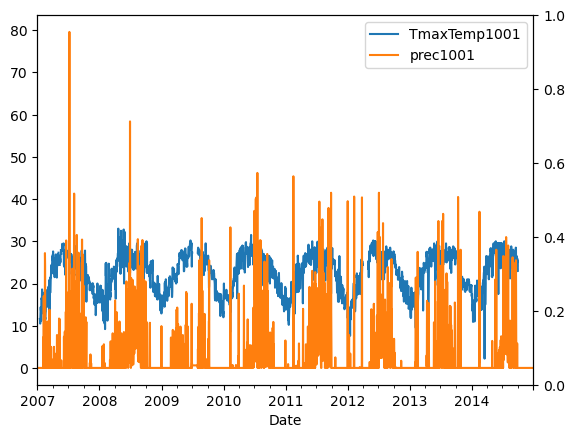

In [34]:
#For example, we can quickly make a plot of all the data in our data frame
#This plot doesn't look very good, but we quickly plotted 7 years of data with a single line of code
ax1 = data.plot(y = ['TmaxTemp1001'])
ax2 = twinx()
data.plot(y = ['prec1001'], ax = ax1)

Text(0, 0.5, 'Temperature')

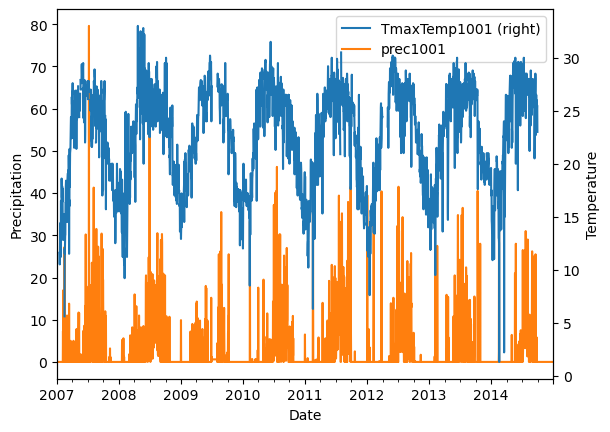

In [37]:
rc('font', size=10)            # Set the font size for the plot
ax1 = data.plot(y = ['TmaxTemp1001', 'prec1001'], secondary_y=['TmaxTemp1001']) # Save the primary (left) y axis in ax1
# Set the y label on the primary (left) y axis
ax1.set_ylabel('Precipitation')
ylabel('Temperature') # Label the secondary y axis
#It's a bit tricky to control legend location in this type of plot, but this is one way
#Try uncommenting the code to see what happens
#leg = ax1.get_legend()
#leg._loc = leg.codes['upper right']

Text(0, 0.5, 'Precipitation (mm)')

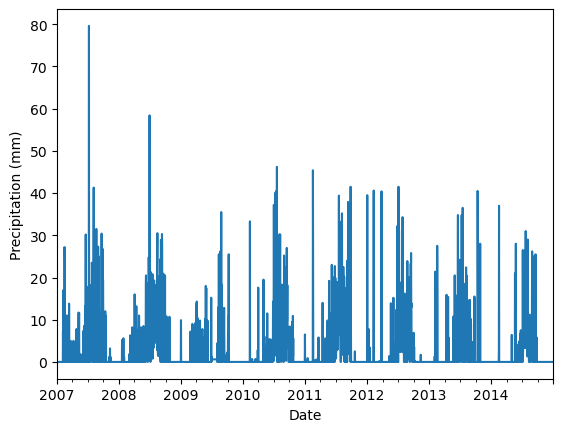

In [12]:
#Perhaps we're interested in precipitation, we can plot it for each day
data['prec1001'].plot()
ylabel('Precipitation (mm)')

Text(0, 0.5, 'Precipitation (mm)')

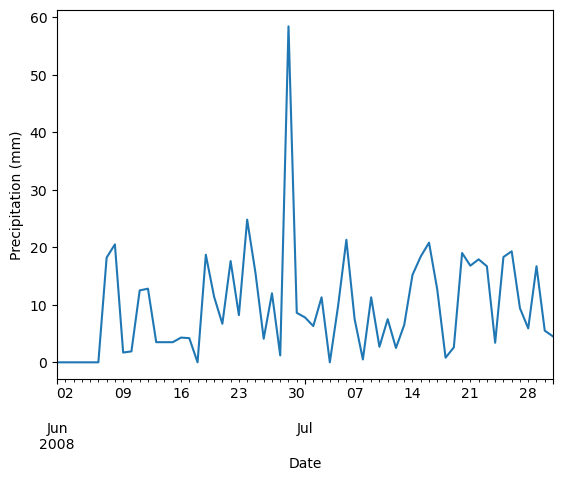

In [13]:
#For these data, it makes more sense to look at the statistics for certain periods of time. 
#We need to examine a slice of the data. Let's look at data for the months of June-July 2008

jj2008_data = data['2008-06-01':'2008-07-31'].copy() #make a new data frame with the data we're interested in

jj2008_data['prec1001'].plot()
ylabel("Precipitation (mm)")

Text(0, 0.5, 'Precipitation (mm)')

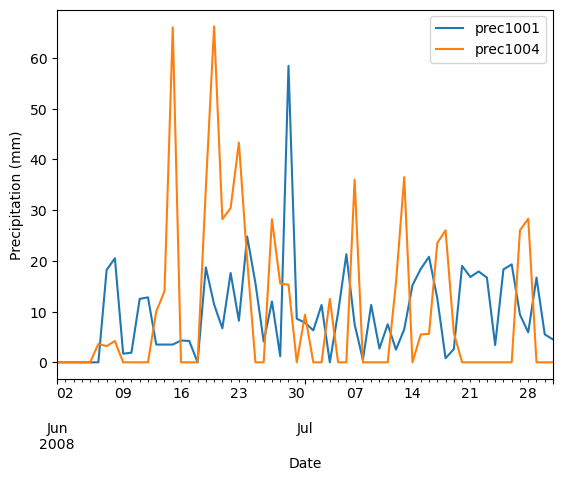

In [14]:
#I could also plot the precipitation at both Site 1001 and Site 1004 on the same axes

jj2008_data.plot(y = ['prec1001', 'prec1004'])
ylabel('Precipitation (mm)')

<AxesSubplot:xlabel='Date'>

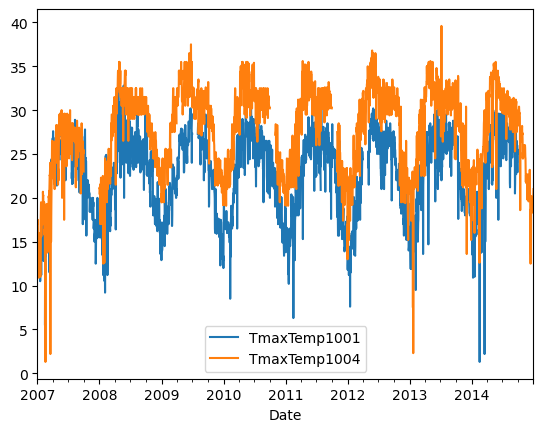

In [16]:
data.plot(y = ['TmaxTemp1001', 'TmaxTemp1004'])

## Quick Descriptive Statistics

In [17]:
#Quickly find the basic statistics for a column of data
data['TmaxTemp1001'].describe()

count    2717.000000
mean       22.615679
std         4.691441
min         1.300000
25%        18.800000
50%        23.600000
75%        26.500000
max        33.000000
Name: TmaxTemp1001, dtype: float64

## Histograms

Text(0, 0.5, 'Probability')

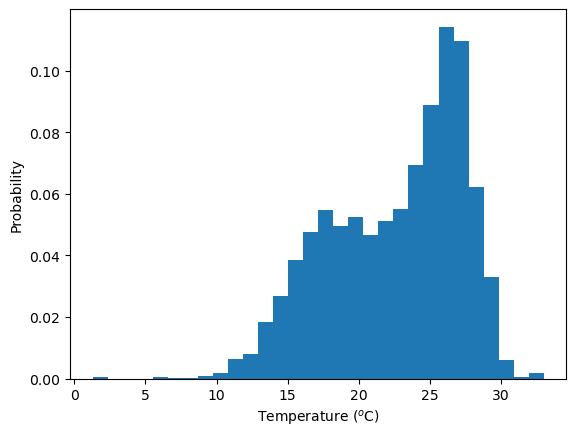

In [23]:
#Pandas makes it easy to create a histogram of your data
#the histogram shows us the distribution of values 
data['TmaxTemp1001'].hist(bins = 30, density = True, grid = False)
xlabel("Temperature ($^o$C)")
ylabel("Probability")

<AxesSubplot:>

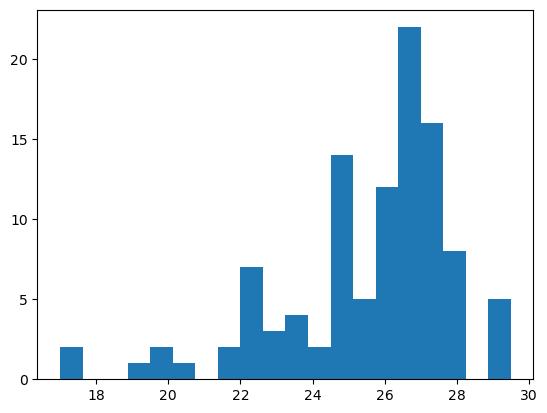

In [21]:
#Let's take a look at the histogram if we restrict our data to just the summer months, June-September 2007
summer_data = data['2007-06-01':'2007-09-30'].copy()
summer_data['TmaxTemp1001'].hist(bins = 20, density = False, grid = False)

## Box and Whisker Plots

Text(0, 0.5, 'Precipitation (mm)')

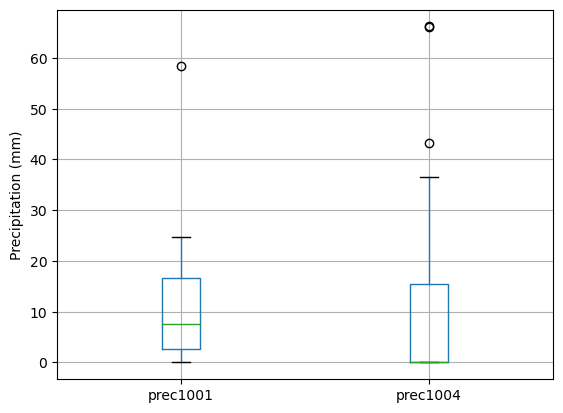

In [24]:
#Perhaps we want to compare the rainfall recorded between the two sites: Site 1001 and Site 1004
#This is a good opportunity to create a boxplot

jj2008_data.boxplot(column = ['prec1001', 'prec1004'], grid = True)
ylabel('Precipitation (mm)')

### Understanding Boxplots:

#### Boxplots are a convenient way to display data that is normally distributed or nearly so. Temperature, rainfall, sizes of objects, etc. There are three important parts of the boxplot: the median, the Interquartile Range (IQR), the whiskers, and outliers. 

#### The median of the data is marked with a line within the box. In the plot above, the median is marked with a green line.

#### The box represents the IQR and represents 50% of the measurements. For Site 1001, the Q1 boundary is at approximately 3 mm, and the Q3 boundary is at about 17 mm. This means that half of all rain events recorded during this time period were between ~3-17 mm. 

#### The whiskers go no further than 1.5*IQR and represent where nearly all of the measurements lie.

#### Outliers are plotted as individual points outside of the whiskers. If present, these represent extreme values in our data. 

### Compare the boxplots for Site 1001 and Site 1004. What can we say about the differences in precipitation at these sites during June-July 2008? 
#### Think about the following:
#### -What are the median values at each site?
#### -Which site received the biggest rainfall event?
#### -Which site do you think received more rain? 

## Cumulative Sums

Text(0, 0.5, 'Precipitation (mm)')

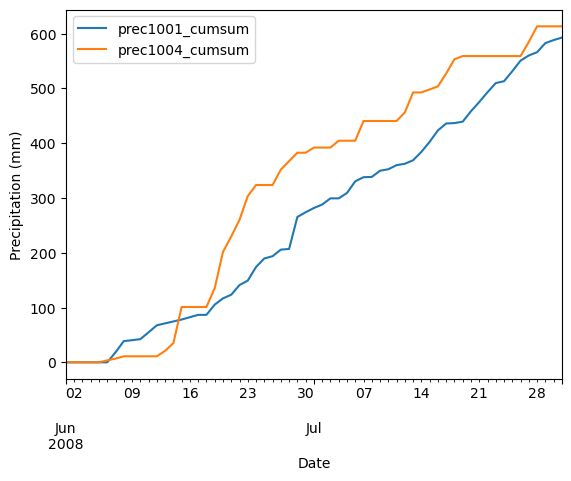

In [25]:
jj2008_data['prec1001_cumsum'] = jj2008_data['prec1001'].cumsum()
jj2008_data['prec1004_cumsum'] = jj2008_data['prec1004'].cumsum()
jj2008_data.plot(y=['prec1001_cumsum','prec1004_cumsum'])
ylabel("Precipitation (mm)")

In [26]:
#Let's make a new column in the dataframe "data" that stores the mean temperature at
#both sites (1001 and 1004)

data['Tmean1001'] = (data['TmaxTemp1001'] + data['TminTemp1001'])/2
data['Tmean1004'] = (data['TmaxTemp1004'] + data['TminTemp1004'])/2
data

,TmaxTemp1001,TminTemp1001,TmaxTemp1004,TminTemp1004,prec1001,prec1004,Tmean1001,Tmean1004
Date,,,,,,,,
2007-01-01,NaN,NaN,17.0,4.5,0.0,0.0,NaN,10.75
2007-01-02,NaN,NaN,17.0,5.4,0.0,0.0,NaN,11.20
2007-01-03,NaN,NaN,17.5,5.9,0.0,0.0,NaN,11.70
2007-01-04,NaN,NaN,14.6,1.5,0.0,0.0,NaN,8.05
2007-01-05,NaN,NaN,14.3,2.5,0.0,0.0,NaN,8.40
...,...,...,...,...,...,...,...,...
2014-12-27,NaN,NaN,19.2,7.6,0.0,0.0,NaN,13.40
2014-12-28,NaN,NaN,19.5,7.3,0.0,0.0,NaN,13.40
2014-12-29,NaN,NaN,19.7,7.6,0.0,0.0,NaN,13.65


Text(0, 0.5, 'Temperature ($^o$C)')

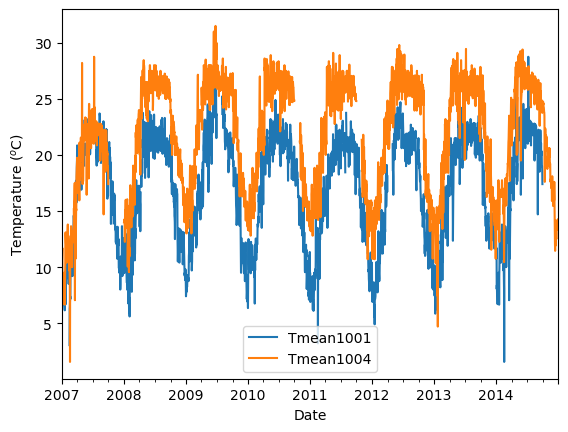

In [27]:
data.plot(y = ['Tmean1001', 'Tmean1004'])
ylabel('Temperature ($^o$C)')

## Rolling Means

<AxesSubplot:xlabel='Date'>

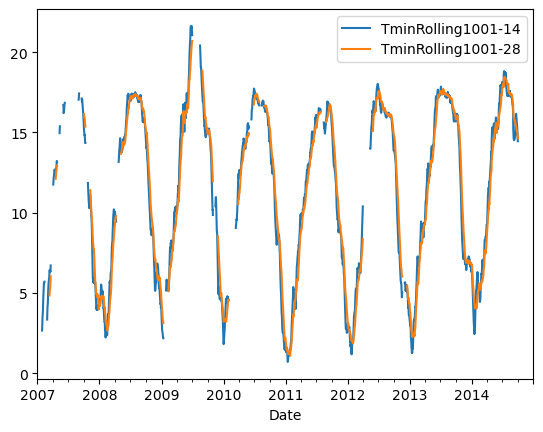

In [29]:
data['TminRolling1001-7'] = data['TminTemp1001'].rolling(7).mean()
data['TminRolling1001-14'] = data['TminTemp1001'].rolling(14).mean()
data['TminRolling1001-28'] = data['TminTemp1001'].rolling(28).mean()
data.plot(y = ['TminRolling1001-14','TminRolling1001-28'])

### Challenge: (1) Plot the maximum and minimum daily temperatures at Site 1001 for the entire year of 2013. (2) Plot the cumulative sum of precipitation at site 1001 for 2013 at Site 1001. (3) Create a boxplot comparing the maximum daily temperature at both Sites 1001 and 1004 during the month of August 2013. 

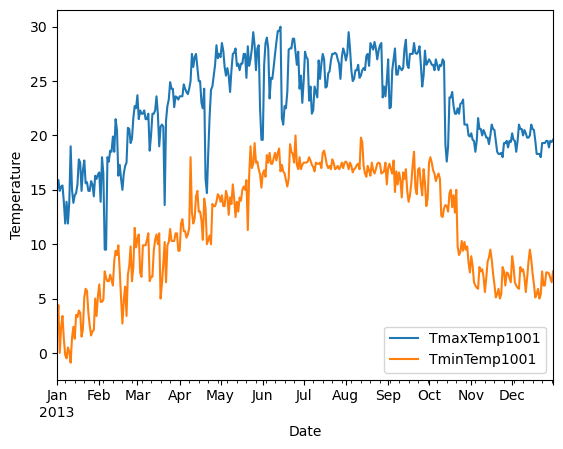

C:\Users\rstrickland\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\rstrickland\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


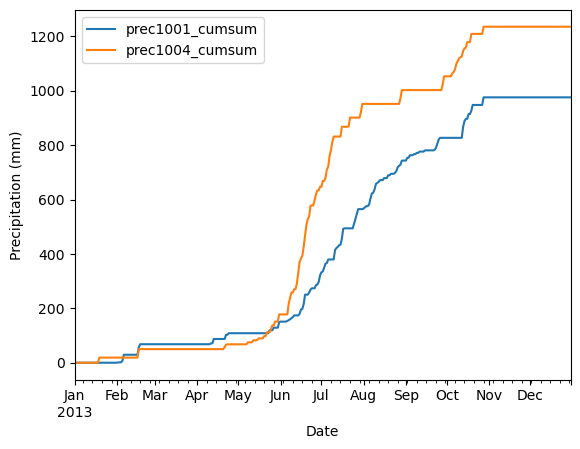

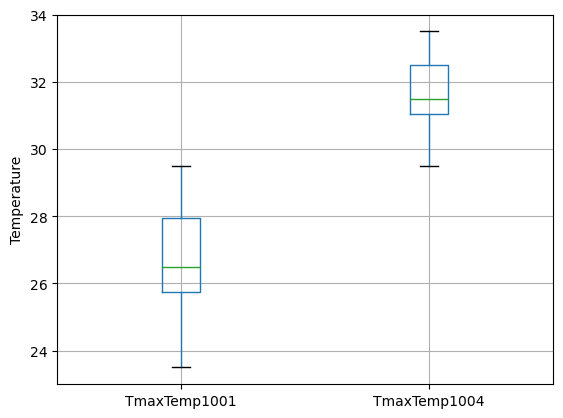

In [32]:
"""
Follow these steps:
1. Create a new dataframe by slicing the rows that include 2013 from the original dataframe.
2. Use Pandas to plot the maximum and minimum daily temperatures at Site 1001. Label the y-axis
3. Create two new columns in your dataframe to calculate the cumulative sum of precipitation for both sites. 
4. Plot the cumulative sum of precipitation columns.
5. Slice your dataframe so that in only includes the month of August. 
6. Create boxplots of maximum temperature at both sites. 

You can copy/paste code from above to make it easier. You will need to make changes to the code to
complete the challenge. Don't be afraid to ask for help! 
"""

#Step 1
data2013 = data["2013-01-01":"2013-12-31"]

#Step 2
data2013.plot(y = ['TmaxTemp1001', 'TminTemp1001'])
ylabel('Temperature')
show()

#Step 3

data2013['prec1001_cumsum'] = data2013['prec1001'].cumsum()
data2013['prec1004_cumsum'] = data2013['prec1004'].cumsum()

#Step 4
data2013.plot(y = ['prec1001_cumsum', 'prec1004_cumsum'])
ylabel('Precipitation (mm)')
show()

#Step 5
aug_2013 = data2013['2013-08-01':'2013-08-31']

#Step 6
aug_2013.boxplot(column = ['TmaxTemp1001', 'TmaxTemp1004'])
ylabel("Temperature")
show()
